In [8]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time

/Users/ciprian/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [12]:
#Step 1: load the data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [17]:
#Step 2: build the model
model = Sequential()

model.add(LSTM(
    input_dim = 1,
    output_dim = 50,
    return_sequences = True))

model.add(Dropout(0.2))

model.add(LSTM(
    100, 
    return_sequences = False))

model.add(Dropout(0.2))

model.add(Dense(output_dim = 1))

model.add(Activation('linear'))

start = time.time()

model.compile(loss = 'mse', optimizer='rmsprop')

print('compilation time : ', time.time() - start)

('compilation time : ', 0.02550792694091797)


In [18]:
#Step 3: Train the model
model.fit(X_train,
         y_train,
         batch_size = 512,
         nb_epoch = 1,
         validation_split = 0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 6s - loss: 0.0029 - val_loss: 8.6764e-04


yo


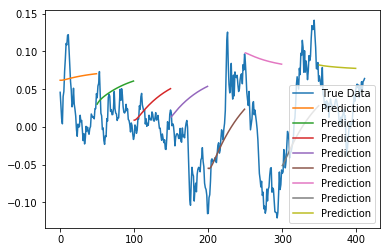

In [20]:
#Step 4: Plot the predictions
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)